In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# To design this model we will follow the following steps

## Steps
## 1. Acquire training and testing data
## 2. Wrangle, prepare, cleanse the data.
## 3. Analyze, identify patterns, and explore the data.(Preprocess + EDA + Feature Selection)
## 4. Model, predict and solve the problem.
## 5. Submit the model




In [2]:
# we may do one step before or after 

### Step 1

In [3]:
train_df=pd.read_csv('/kaggle/input/titanic/train.csv')
test_df=pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.700,G6,S
151,152,1,1,"Pears, Mrs. Thomas (Edith Wearne)",female,22.0,1,0,113776,66.600,C2,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.925,NaN,S
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.250,NaN,Q
592,593,0,3,"Elsbury, Mr. William James",male,47.0,0,0,A/5 3902,7.250,NaN,S


In [5]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
266,1158,1,"Chisholm, Mr. Roderick Robert Crispin",male,NaN,0,0,112051,0.0000,NaN,S
354,1246,3,"Dean, Miss. Elizabeth Gladys Millvina""""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S
344,1236,3,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S
230,1122,2,"Sweet, Mr. George Frederick",male,14.00,0,0,220845,65.0000,NaN,S
261,1153,3,"Nilsson, Mr. August Ferdinand",male,21.00,0,0,350410,7.8542,NaN,S


In [6]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
train_df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
test_df.isnull().mean()*100

PassengerId     0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
# We can conclude that the columns Ticket and cabin can be dropped as ticket has no meaning 
# and no relation to survived and cabin has a lot of missing values i.e (77-78)%
# Also note that there are mising value in Age in both test and train , Fare in test , and Embarked in train

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
"""
using this we understood that:
-all names are unique
-there are two categories in Sex and males are about 65%
-there are 3 categories in Embarked and S is the most freq
"""

'\nusing this we understood that:\n-all names are unique\n-there are two categories in Sex and males are about 65%\n-there are 3 categories in Embarked and S is the most freq\n'

In [13]:
train_df.corr(numeric_only = True)['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

In [14]:
"""
from this & above operation we conclude that Survived is directly related to Pclass,SibSp,Parch,Embarked,
Sex,Fare,name and Age 
"""

'\nfrom this & above operation we conclude that Survived is directly related to Pclass,SibSp,Parch,Embarked,\nSex,Fare,name and Age \n'

### Step 3

#### first we will compare categorical data and then numerical data with survived

In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [18]:
# as Parch and SibSp can be clubbed together as Family size we may have better results

In [19]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [20]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# for visualisation of numerical data

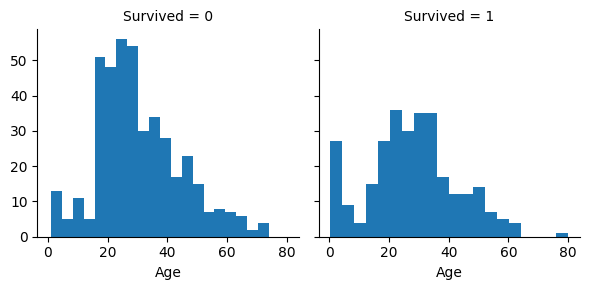

In [22]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

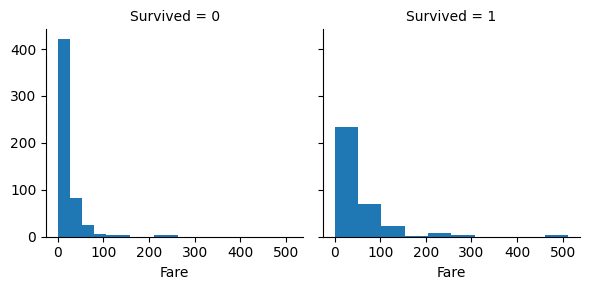

In [23]:
g = sns.FacetGrid(train_df,col='Survived')
g.map(plt.hist,'Fare',bins=10)

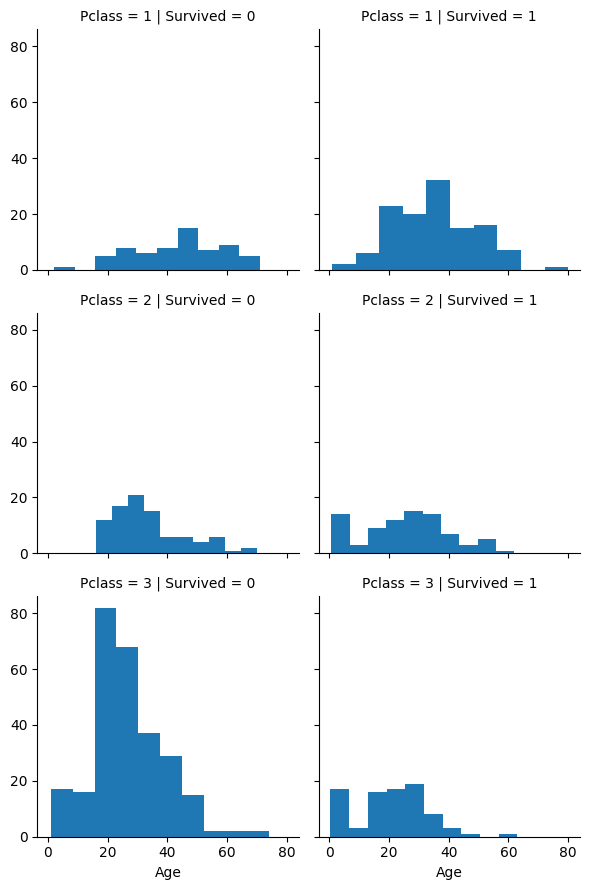

In [24]:
grid = sns.FacetGrid(train_df,row='Pclass',col='Survived')
grid.map(plt.hist,'Age',bins=10)


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


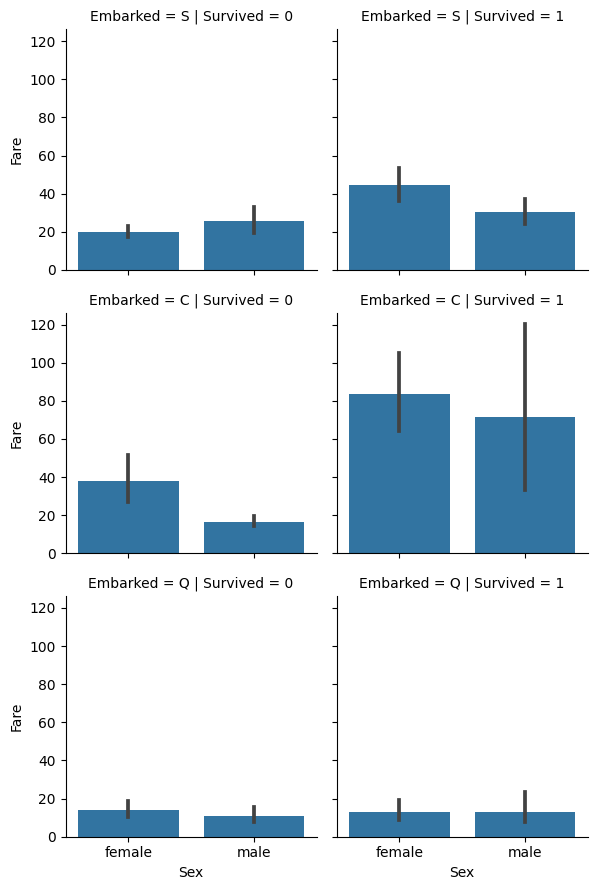

In [25]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived')
grid.map(sns.barplot, 'Sex', 'Fare')
grid.add_legend()

#### Step 2

In [26]:
# Now we will do feature engineering

In [27]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [28]:
train_df=train_df.drop(['Ticket','Cabin'],axis=1)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [29]:
test_df=test_df.drop(['Ticket','Cabin'],axis=1)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [30]:
combine = [train_df,test_df]

In [31]:
# now in the name column we also have a relation between Titles and Survival

In [32]:
for dataset in combine:
    dataset['Title']=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train_df['Title'],train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
# we can club some of these Titles and replace some of them

In [34]:
for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer'] , 'Rare')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')

In [35]:
train_df[['Title','Survived']].groupby(by='Title',as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [36]:
# now we will do label encoding on Title

In [37]:
title_map={"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title']=dataset['Title'].map(title_map)
    dataset['Title'] = dataset['Title'].fillna(0)
test_df.head()    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3.0


In [38]:
test_df['Title'] = test_df['Title'].astype(int)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,3
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,3


In [39]:
# Now we can drop the Name column and the passednger id for the train_df
train_df=train_df.drop(['Name','PassengerId'],axis=1)
test_df=test_df.drop('Name',axis=1)

In [40]:
combine=[train_df,test_df]

In [41]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [42]:
# Now we will fill missing values in Age by using median age in that same Pclass and gender 

In [43]:
guess_ages = np.zeros((2,3))

In [44]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            # Calculate the median age for each Sex and Pclass combination
            guess_df=dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess=guess_df.median()
            # Round the median age to the nearest 0.5
            guess_ages[i, j] = int(age_guess / 0.5 + 0.5) * 0.5
            # Assign the guessed age to the missing Age values
            dataset.loc[(dataset['Age'].isnull()) & (dataset['Sex'] == i) & (dataset['Pclass'] == j+1) , 'Age']=guess_ages[i, j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.tail()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
886,0,2,0,27,0,0,13.00,S,5
887,1,1,1,19,0,0,30.00,S,2
888,0,3,1,21,1,2,23.45,S,2
889,1,1,0,26,0,0,30.00,C,1
890,0,3,0,32,0,0,7.75,Q,1


In [45]:
# Now we will do label encoding on Age column using an additional column Ageband

In [46]:
train_df['Ageband']=pd.cut(train_df['Age'],5)
train_df[['Ageband','Survived']].groupby(['Ageband'] , as_index=False , observed=False).mean().sort_values(by='Ageband', ascending=True)

,Ageband,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [47]:
for dataset in combine:
    dataset.loc[dataset['Age'] <= 16 , 'Age']=0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32) , 'Age']=1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48) , 'Age']=2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64) , 'Age']=3
    dataset.loc[ dataset['Age'] > 64, 'Age']=4
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Ageband
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [48]:
train_df=train_df.drop('Ageband',axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [49]:
# Now we observe that Parch and SibSp can be clubbed as Family size
for dataset in combine:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1
train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [50]:
# We can make another column IsAlone and then can drop FAmilySize ,Parch and SibSp
for dataset in combine:
    dataset['IsAlone']=0
    dataset.loc[dataset['FamilySize']==1,'IsAlone']=1
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,0,1,1,0,7.2500,S,1,2,0
1,1,1,1,2,1,0,71.2833,C,3,2,0
2,1,3,1,1,0,0,7.9250,S,2,1,1
3,1,1,1,2,1,0,53.1000,S,3,2,0
4,0,3,0,2,0,0,8.0500,S,1,1,1


In [51]:
train_df[['IsAlone','Survived']].groupby(by='IsAlone',as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [52]:
train_df=train_df.drop(['FamilySize','Parch','SibSp'],axis=1)
test_df=test_df.drop(['FamilySize','Parch','SibSp'],axis=1)
combine=[train_df,test_df]
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [53]:
# now to relate Age and Pclass more we can introduce a new column Age*class that will provide more intuition
# as the chances of survival in Pclass1 elderly is different as of PClass3 elderly
for dataset in combine:
    dataset['Age*class']=dataset['Age']*dataset['Pclass']

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,0,3,0,1,7.2500,S,1,0,3
1,1,1,1,2,71.2833,C,3,0,2
2,1,3,1,1,7.9250,S,2,1,3
3,1,1,1,2,53.1000,S,3,0,2
4,0,3,0,2,8.0500,S,1,1,6


In [54]:
train_df[['Age*class','Survived']].groupby(by='Age*class',as_index=False).mean()

,Age*class,Survived
0,0,0.550000
1,1,0.728814
2,2,0.520408
3,3,0.277487
4,4,0.415094
5,6,0.149425
6,8,0.000000
7,9,0.111111
8,12,0.000000


In [55]:
# now filling null values in Embarked , we can just fill na with the most frequent port
train_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [56]:
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
train_df['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

In [57]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [58]:
# Now we will fill 1 missing value in Fare in test data
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,892,3,0,2,7.8292,2,1,1,6
1,893,3,1,2,7.0000,0,3,0,6
2,894,2,0,3,9.6875,2,1,1,6
3,895,3,0,1,8.6625,0,1,1,3
4,896,3,1,1,12.2875,0,3,0,3


In [59]:
train_df['Fareband']=pd.qcut(train_df['Fare'],4)
train_df[['Fareband','Survived']].groupby(['Fareband'] , as_index=False , observed=False).mean().sort_values(by='Fareband', ascending=True)

,Fareband,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [60]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['Fareband'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


In [61]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*class
0,892,3,0,2,0,2,1,1,6
1,893,3,1,2,0,0,3,0,6
2,894,2,0,3,1,2,1,1,6
3,895,3,0,1,1,0,1,1,3
4,896,3,1,1,1,0,3,0,3
5,897,3,0,0,1,0,1,1,0
6,898,3,1,1,0,2,2,1,3
7,899,2,0,1,2,0,1,0,2
8,900,3,1,1,0,1,3,1,3
9,901,3,0,1,2,0,1,0,3


#### Step 4

In [62]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [63]:
X_train=train_df.drop('Survived',axis=1)
Y_train=train_df['Survived']
X_test=test_df.drop('PassengerId',axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [64]:
# Logistic Regression
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred=logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

81.37

In [65]:
# Now we will use this data for further models and we will see the correlation between the columns and survived
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.201057
5,Title,0.406027
4,Embarked,0.276628
6,IsAlone,0.185986
7,Age*class,-0.050260
3,Fare,-0.071665
2,Age,-0.469638
0,Pclass,-1.200309


In [66]:
# Support Vector Machines
svc=SVC()
svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
acc_svc=round(svc.score(X_train,Y_train)*100,2)
acc_svc

82.83

In [67]:
# KNN or k-Nearest Neighbors
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
acc_knn=round(knn.score(X_train,Y_train)*100,2)
acc_knn

83.73

In [68]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.88

In [69]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

79.35

In [70]:
# Linear SVC

linear_svc = LinearSVC() #this can be done - (max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.46

In [71]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.56

In [72]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.64

In [73]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.64

In [74]:
# Now we will compare all the models
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.64
8,Decision Tree,86.64
1,KNN,83.73
0,Support Vector Machines,82.83
2,Logistic Regression,81.37
7,Linear SVC,79.46
5,Perceptron,79.35
6,Stochastic Gradient Decent,78.56
4,Naive Bayes,76.88


#### Step 5

In [75]:
# Now we will submit our result
submission=pd.DataFrame({
    "PassengerId" : test_df["PassengerId"],
    "Survived" : Y_pred
})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [76]:
submission.to_csv("Submission" , index=False)

# Thanks for being here.